# IMP Event Log

This is an event log of an incident management process extracted from data gathered from the audit system of an instance of the ServiceNowTM platform used by an IT company. The event log is enriched with data loaded from a relational database underlying a corresponding process-aware information system. Information was anonymized for privacy.


Number of instances: 141,712 events (24,918 incidents)
Number of attributes: 36 attributes (1 case identifier, 1 state identifier, 32 descriptive attributes, 2 dependent variables)

The attributed â€˜closed_atâ€™ is used to determine the dependent variable for the time completion prediction task. The attribute â€˜resolved_atâ€™ is highly correlated with â€˜closed_atâ€™. In this event log, some rows may have the same values (they are equal) since not all attributes involved in the real-world process are present in the log.

Attributes used to record textual information are not placed in this log.

The missing values should be considered â€˜unknown informationâ€™.

Attribute Information:

1. number: incident identifier (24,918 different values);
2. incident state: eight levels controlling the incident management process transitions from opening until closing the case;
3. active: boolean attribute that shows whether the record is active or closed/canceled;
4. reassignment_count: number of times the incident has the group or the support analysts changed;
5. reopen_count: number of times the incident resolution was rejected by the caller;
6. sys_mod_count: number of incident updates until that moment;
7. made_sla: boolean attribute that shows whether the incident exceeded the target SLA;
8. caller_id: identifier of the user affected;
9. opened_by: identifier of the user who reported the incident;
10. opened_at: incident user opening date and time;
11. sys_created_by: identifier of the user who registered the incident;
12. sys_created_at: incident system creation date and time;
13. sys_updated_by: identifier of the user who updated the incident and generated the current log record;
14. sys_updated_at: incident system update date and time;
15. contact_type: categorical attribute that shows by what means the incident was reported;
16. location: identifier of the location of the place affected;
17. category: first-level description of the affected service;
18. subcategory: second-level description of the affected service (related to the first level description, i.e., to category);
19. u_symptom: description of the user perception about service availability;
20. cmdb_ci: (confirmation item) identifier used to report the affected item (not mandatory);
21. impact: description of the impact caused by the incident (values: 1 High; 2 Medium; 3 Low);
22. urgency: description of the urgency informed by the user for the incident resolution (values: 1 High; 2 Medium; 3 Low);
23. priority: calculated by the system based on 'impact' and 'urgency';
24. assignment_group: identifier of the support group in charge of the incident;
25. assigned_to: identifier of the user in charge of the incident;
26. knowledge: boolean attribute that shows whether a knowledge base document was used to resolve the incident;
27. u_priority_confirmation: boolean attribute that shows whether the priority field has been double-checked;
28. notify: categorical attribute that shows whether notifications were generated for the incident;
29. problem_id: identifier of the problem associated with the incident;
30. rfc: (request for change) identifier of the change request associated with the incident;
31. vendor: identifier of the vendor in charge of the incident;
32. caused_by: identifier of the RFC responsible by the incident;
33. close_code: identifier of the resolution of the incident;
34. resolved_by: identifier of the user who resolved the incident;
35. resolved_at: incident user resolution date and time (dependent variable);
36. closed_at: incident user close date and time (dependent variable).



Relevant Papers:

Amaral, C. A. L., Fantinato, M., Reijers, H. A., Peres, S. M., Enhancing Completion Time Prediction Through Attribute Selection. Proceedings of the 15th International Conference on Advanced Information Technologies for Management (AITM 2018) and 13th International Conference on Information Systems Management (ISM 2018), Revised Selected Papers â€“ Lecture Notes in Business Information Processing, v. 346, pp. 3-23, 2019. 

Amaral, C. A. L., Fantinato, M., Peres, S. M., Attribute Selection with Filter and Wrapper: An Application on Incident Management Process. Proceedings of the 14th Federated Conference on Computer Science and Information Systems (FedCSIS 2018), pp. 679-682, 2018. 

Maita, A. R. C., Martins, L. C., Paz, C. R. L., Rafferty, L., Hung, P., Peres, S. M., Fantinato, M. A systematic mapping study of process mining. Enterprise Information Systems, v. 12, n. 5, pp. 505-549, 2018. 



## Importing relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics



## Importing the dataset

In [2]:
data = pd.read_csv('incident_event_log.csv')

## Getting to know Dataset Nature

In [3]:
print(data.shape)

(141712, 36)


In [4]:
data.head(20)  

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
5,INC0000047,Active,True,1,0,1,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
6,INC0000047,Active,True,1,0,2,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
7,INC0000047,Active,True,1,0,3,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
8,INC0000047,Active,True,1,0,4,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
9,INC0000047,Active,True,1,0,5,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [5]:
data.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


reassignment_count: number of times the incident has the group or the support analysts changed;

reopen_count: number of times the incident resolution was rejected by the caller;

sys_mod_count: number of incident updates until that moment;

made_sla: boolean attribute that shows whether the incident exceeded the target SLA;

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [7]:
print(data.isnull().sum()) 

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

In [8]:
#incident state: eight levels controlling the incident management process transitions from opening until closing the case;
incident_state  = data['incident_state'].value_counts(ascending=False)

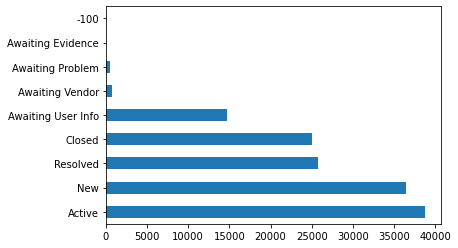

In [9]:
x_incident_state = incident_state.iloc[:15].plot(kind='barh')

In [10]:
incident_state

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

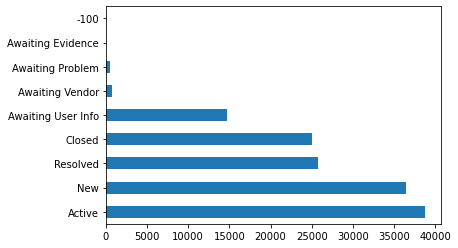

In [11]:
x_incident_state = incident_state.iloc[:15].plot(kind='barh')

In [12]:
data.value_counts("made_sla")

made_sla
True     132497
False      9215
dtype: int64

### Selecting all columns that is known as a new job.

In [13]:
COLS = ['incident_state','contact_type','location','category','subcategory','u_symptom','impact','urgency','assignment_group','vendor','made_sla']

In [14]:
data_sla = data[COLS]

In [15]:
resolved_incidents_sla = data_sla[data_sla['incident_state'] == 'Closed']

In [16]:
resolved_incidents_sla.head()

,incident_state,contact_type,location,category,subcategory,u_symptom,impact,urgency,assignment_group,vendor,made_sla
3,Closed,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,2 - Medium,Group 56,?,True
12,Closed,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,2 - Medium,Group 24,?,True
19,Closed,Phone,Location 204,Category 20,Subcategory 125,Symptom 471,2 - Medium,2 - Medium,Group 70,?,True
23,Closed,Phone,Location 204,Category 9,Subcategory 97,Symptom 450,2 - Medium,2 - Medium,Group 25,?,True
31,Closed,Phone,Location 93,Category 53,Subcategory 168,Symptom 232,1 - High,2 - Medium,Group 23,?,False


In [17]:
print (resolved_incidents_sla.shape)

(24985, 11)


In [18]:
data_processed_drop_nan_sla = resolved_incidents_sla[resolved_incidents_sla['location'] != "?"]

In [19]:
data_processed_drop_nan_sla = data_processed_drop_nan_sla[data_processed_drop_nan_sla['category'] != "?"]

In [20]:
data_processed_drop_nan_sla = data_processed_drop_nan_sla[data_processed_drop_nan_sla['u_symptom'] != "?"]

In [21]:
data_processed_drop_nan_sla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19129 entries, 3 to 141711
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   incident_state    19129 non-null  object
 1   contact_type      19129 non-null  object
 2   location          19129 non-null  object
 3   category          19129 non-null  object
 4   subcategory       19129 non-null  object
 5   u_symptom         19129 non-null  object
 6   impact            19129 non-null  object
 7   urgency           19129 non-null  object
 8   assignment_group  19129 non-null  object
 9   vendor            19129 non-null  object
 10  made_sla          19129 non-null  bool  
dtypes: bool(1), object(10)
memory usage: 1.6+ MB


In [22]:
data_processed_drop_nan_sla.value_counts("made_sla")

made_sla
True     12561
False     6568
dtype: int64

### Barh charts on value counts

In [23]:
location  = data_processed_drop_nan_sla['location'].value_counts(ascending=False)

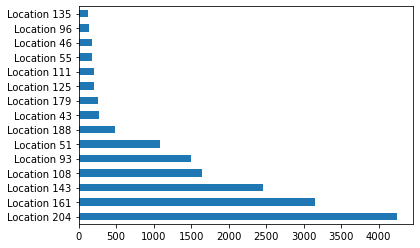

In [24]:
x_location = location.iloc[:15].plot(kind='barh')

In [25]:
category = data_processed_drop_nan_sla['category'].value_counts(ascending=False)

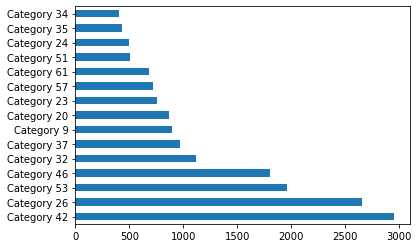

In [26]:
x_category = category.iloc[:15].plot(kind='barh')

In [27]:
category = data_processed_drop_nan_sla['assignment_group'].value_counts(ascending=False)

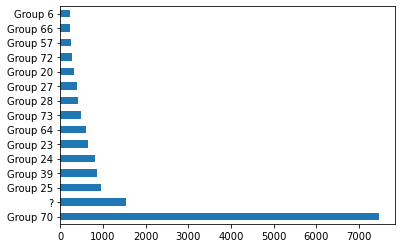

In [28]:
x_assignment_group = category.iloc[:15].plot(kind='barh')

In [29]:
cols = ['category']

data_sla[cols] = data_sla[cols].replace({'Category ':''}, regex = True) 

C:\Users\isuri\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
data_sla.value_counts("vendor")

vendor
?           141468
code 8s        167
Vendor 1        69
Vendor 3         6
Vendor 2         2
dtype: int64

In [31]:
data_sla.value_counts("assignment_group")

assignment_group
Group 70    43474
?           14213
Group 25     7679
Group 24     6752
Group 20     6170
            ...  
Group 41        3
Group 38        2
Group 16        1
Group 4         1
Group 11        1
Length: 79, dtype: int64

In [32]:
data_sla.value_counts("category")

category
26    18453
42    15977
53    15968
46    13324
23     7779
9      7365
32     7273
37     6584
57     6532
20     5506
61     5168
24     4561
34     3946
40     3760
45     3619
51     2390
28     2256
35     2037
44     1798
19     1592
13      994
43      858
55      801
17      512
22      420
56      322
38      290
8       264
7       207
33      160
54      139
50       93
31       92
63       78
?        78
2        77
21       69
47       50
59       42
41       36
29       32
5        31
25       30
62       25
10       24
4        22
52       16
30       15
48       10
6         7
16        7
58        5
14        5
12        3
15        3
49        2
36        2
27        2
3         1
dtype: int64

In [33]:
data_sla.value_counts("location")

location
Location 204    31690
Location 161    22605
Location 143    19245
Location 108    12623
Location 93     11554
                ...  
Location 227        3
Location 53         3
Location 166        2
Location 31         2
Location 132        2
Length: 225, dtype: int64

In [34]:
predict = data_sla[data_sla['category'] != '?']

In [35]:
predict = data_sla[data_sla['location'] != '?']

In [36]:
predict = data_sla[data_sla['assignment_group'] != '?']

In [37]:
predict = data_sla[data_sla['vendor'] != '?']

In [38]:
predict

,incident_state,contact_type,location,category,subcategory,u_symptom,impact,urgency,assignment_group,vendor,made_sla
7857,Awaiting Vendor,Phone,Location 204,24,Subcategory 174,Symptom 491,2 - Medium,2 - Medium,Group 25,code 8s,True
7858,Awaiting Vendor,Phone,Location 204,24,Subcategory 174,Symptom 491,2 - Medium,2 - Medium,Group 25,code 8s,True
9086,Awaiting Vendor,Phone,Location 204,34,Subcategory 154,?,2 - Medium,2 - Medium,Group 25,code 8s,True
9087,Awaiting Vendor,Phone,Location 204,34,Subcategory 154,?,2 - Medium,2 - Medium,Group 25,code 8s,True
9088,Awaiting Vendor,Phone,Location 204,34,Subcategory 154,?,2 - Medium,2 - Medium,Group 25,code 8s,True
...,...,...,...,...,...,...,...,...,...,...,...
137209,Active,Phone,Location 204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True
137210,Awaiting Vendor,Phone,Location 204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True
137211,Awaiting Vendor,Phone,Location 204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True
137212,Resolved,Phone,Location 204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True


In [39]:
predict.vendor.unique()

array(['code 8s', 'Vendor 3', 'Vendor 2', 'Vendor 1'], dtype=object)

In [40]:
cols = ['location']

data_sla[cols] = data_sla[cols].replace({'Location ':''}, regex = True) 

C:\Users\isuri\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [41]:
predict

,incident_state,contact_type,location,category,subcategory,u_symptom,impact,urgency,assignment_group,vendor,made_sla
7857,Awaiting Vendor,Phone,Location 204,24,Subcategory 174,Symptom 491,2 - Medium,2 - Medium,Group 25,code 8s,True
7858,Awaiting Vendor,Phone,Location 204,24,Subcategory 174,Symptom 491,2 - Medium,2 - Medium,Group 25,code 8s,True
9086,Awaiting Vendor,Phone,Location 204,34,Subcategory 154,?,2 - Medium,2 - Medium,Group 25,code 8s,True
9087,Awaiting Vendor,Phone,Location 204,34,Subcategory 154,?,2 - Medium,2 - Medium,Group 25,code 8s,True
9088,Awaiting Vendor,Phone,Location 204,34,Subcategory 154,?,2 - Medium,2 - Medium,Group 25,code 8s,True
...,...,...,...,...,...,...,...,...,...,...,...
137209,Active,Phone,Location 204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True
137210,Awaiting Vendor,Phone,Location 204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True
137211,Awaiting Vendor,Phone,Location 204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True
137212,Resolved,Phone,Location 204,24,Subcategory 228,Symptom 101,2 - Medium,2 - Medium,Group 25,Vendor 1,True


In [42]:
predict.value_counts("made_sla")

made_sla
True     234
False     10
dtype: int64

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [43]:

df2 = pd.DataFrame(np.random.rand(10, 3), columns=["location", "assignment_group", "impact",])

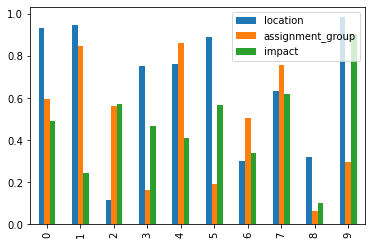

In [44]:
df2.plot.bar();

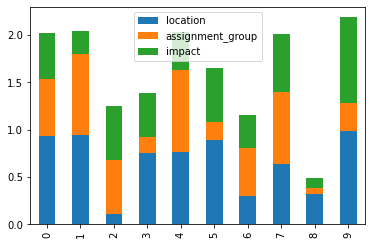

In [45]:
df2.plot.bar(stacked=True);

In [46]:
df = pd.DataFrame(
    3 * np.random.rand(4, 2), index=["location", "assignment_group", "impact","made_sla"], columns=["x", "y"]
)

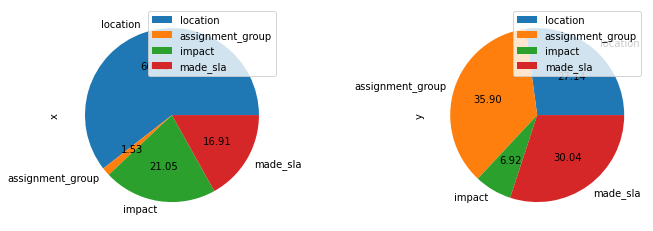

In [47]:
df.plot.pie(subplots=True, figsize=(12, 4),autopct="%.2f");

## Spliting Data to Train and Test

### CatBoostClassifier

In [48]:
X = data_processed_drop_nan_sla.drop(['made_sla'], axis=1)
y = data_processed_drop_nan_sla.made_sla

In [49]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234, stratify=y)


https://stackoverflow.com/questions/60648547/how-to-increase-accuracy-of-model-using-catboost

https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

In [50]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]


In [51]:
 best_params = {
            'bagging_temperature': 0.5,
            'depth': 8,
            'iterations': 600,
            'learning_rate': 0.5,
            'sampling_frequency': 'PerTreeLevel',
            'leaf_estimation_method': 'Gradient',
            'random_strength': 0.8,
            'l2_leaf_reg': 50,
            'max_ctr_complexity': 2,
            'fold_len_multiplier': 2, 
            'eval_metric': 'AUC'
     
    }

In [52]:

model=CatBoostClassifier(**best_params)
model.fit(X_train, y_train, cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7583703	best: 0.7583703 (0)	total: 369ms	remaining: 3m 41s
1:	test: 0.7881533	best: 0.7881533 (1)	total: 745ms	remaining: 3m 42s
2:	test: 0.8017268	best: 0.8017268 (2)	total: 951ms	remaining: 3m 9s
3:	test: 0.8107966	best: 0.8107966 (3)	total: 1.23s	remaining: 3m 3s
4:	test: 0.8143538	best: 0.8143538 (4)	total: 1.4s	remaining: 2m 46s
5:	test: 0.8174513	best: 0.8174513 (5)	total: 1.65s	remaining: 2m 42s
6:	test: 0.8208797	best: 0.8208797 (6)	total: 1.96s	remaining: 2m 45s
7:	test: 0.8211309	best: 0.8211309 (7)	total: 2.15s	remaining: 2m 39s
8:	test: 0.8221940	best: 0.8221940 (8)	total: 2.49s	remaining: 2m 43s
9:	test: 0.8226078	best: 0.8226078 (9)	total: 2.69s	remaining: 2m 38s
10:	test: 0.8231191	best: 0.8231191 (10)	total: 3.16s	remaining: 2m 49s
11:	test: 0.8232646	best: 0.8232646 (11)	total: 3.52s	remaining: 2m 52s
12:	test: 0.8226026	best: 0.8232646 (11)	total: 3.61s	remaining: 2m 42s
13:	test: 0.8225987	best: 0.8232646 (11)	total: 3.65s	remaining: 2m 32s
14:	test: 0.823

116:	test: 0.8139731	best: 0.8247433 (21)	total: 26.5s	remaining: 1m 49s
117:	test: 0.8138440	best: 0.8247433 (21)	total: 26.7s	remaining: 1m 49s
118:	test: 0.8135005	best: 0.8247433 (21)	total: 26.9s	remaining: 1m 48s
119:	test: 0.8131182	best: 0.8247433 (21)	total: 27.1s	remaining: 1m 48s
120:	test: 0.8133019	best: 0.8247433 (21)	total: 27.3s	remaining: 1m 47s
121:	test: 0.8131844	best: 0.8247433 (21)	total: 27.5s	remaining: 1m 47s
122:	test: 0.8132519	best: 0.8247433 (21)	total: 27.7s	remaining: 1m 47s
123:	test: 0.8131922	best: 0.8247433 (21)	total: 27.8s	remaining: 1m 46s
124:	test: 0.8121138	best: 0.8247433 (21)	total: 28s	remaining: 1m 46s
125:	test: 0.8119628	best: 0.8247433 (21)	total: 28.2s	remaining: 1m 46s
126:	test: 0.8113448	best: 0.8247433 (21)	total: 28.4s	remaining: 1m 45s
127:	test: 0.8113385	best: 0.8247433 (21)	total: 28.6s	remaining: 1m 45s
128:	test: 0.8115730	best: 0.8247433 (21)	total: 28.8s	remaining: 1m 45s
129:	test: 0.8114192	best: 0.8247433 (21)	total: 29s	

229:	test: 0.7991741	best: 0.8247433 (21)	total: 49.5s	remaining: 1m 19s
230:	test: 0.7994989	best: 0.8247433 (21)	total: 49.7s	remaining: 1m 19s
231:	test: 0.7997580	best: 0.8247433 (21)	total: 49.9s	remaining: 1m 19s
232:	test: 0.7997976	best: 0.8247433 (21)	total: 50.2s	remaining: 1m 19s
233:	test: 0.7995889	best: 0.8247433 (21)	total: 50.4s	remaining: 1m 18s
234:	test: 0.7995121	best: 0.8247433 (21)	total: 50.6s	remaining: 1m 18s
235:	test: 0.7993890	best: 0.8247433 (21)	total: 50.8s	remaining: 1m 18s
236:	test: 0.7992393	best: 0.8247433 (21)	total: 51s	remaining: 1m 18s
237:	test: 0.7990149	best: 0.8247433 (21)	total: 51.1s	remaining: 1m 17s
238:	test: 0.7990235	best: 0.8247433 (21)	total: 51.3s	remaining: 1m 17s
239:	test: 0.7989117	best: 0.8247433 (21)	total: 51.5s	remaining: 1m 17s
240:	test: 0.7985191	best: 0.8247433 (21)	total: 51.7s	remaining: 1m 17s
241:	test: 0.7984207	best: 0.8247433 (21)	total: 51.9s	remaining: 1m 16s
242:	test: 0.7980808	best: 0.8247433 (21)	total: 52.1

343:	test: 0.7961007	best: 0.8247433 (21)	total: 1m 13s	remaining: 54.6s
344:	test: 0.7959885	best: 0.8247433 (21)	total: 1m 13s	remaining: 54.3s
345:	test: 0.7959602	best: 0.8247433 (21)	total: 1m 13s	remaining: 54.1s
346:	test: 0.7960017	best: 0.8247433 (21)	total: 1m 13s	remaining: 53.9s
347:	test: 0.7971750	best: 0.8247433 (21)	total: 1m 14s	remaining: 53.6s
348:	test: 0.7968614	best: 0.8247433 (21)	total: 1m 14s	remaining: 53.4s
349:	test: 0.7968502	best: 0.8247433 (21)	total: 1m 14s	remaining: 53.1s
350:	test: 0.7965831	best: 0.8247433 (21)	total: 1m 14s	remaining: 52.9s
351:	test: 0.7966104	best: 0.8247433 (21)	total: 1m 14s	remaining: 52.7s
352:	test: 0.7964129	best: 0.8247433 (21)	total: 1m 14s	remaining: 52.5s
353:	test: 0.7963498	best: 0.8247433 (21)	total: 1m 15s	remaining: 52.2s
354:	test: 0.7961243	best: 0.8247433 (21)	total: 1m 15s	remaining: 52s
355:	test: 0.7963841	best: 0.8247433 (21)	total: 1m 15s	remaining: 51.8s
356:	test: 0.7963355	best: 0.8247433 (21)	total: 1m 1

456:	test: 0.7950711	best: 0.8247433 (21)	total: 1m 36s	remaining: 30.2s
457:	test: 0.7947317	best: 0.8247433 (21)	total: 1m 36s	remaining: 30s
458:	test: 0.7947925	best: 0.8247433 (21)	total: 1m 37s	remaining: 29.8s
459:	test: 0.7946355	best: 0.8247433 (21)	total: 1m 37s	remaining: 29.6s
460:	test: 0.7947011	best: 0.8247433 (21)	total: 1m 37s	remaining: 29.4s
461:	test: 0.7943547	best: 0.8247433 (21)	total: 1m 37s	remaining: 29.2s
462:	test: 0.7944756	best: 0.8247433 (21)	total: 1m 37s	remaining: 29s
463:	test: 0.7945837	best: 0.8247433 (21)	total: 1m 38s	remaining: 28.8s
464:	test: 0.7946359	best: 0.8247433 (21)	total: 1m 38s	remaining: 28.6s
465:	test: 0.7945281	best: 0.8247433 (21)	total: 1m 38s	remaining: 28.4s
466:	test: 0.7943376	best: 0.8247433 (21)	total: 1m 39s	remaining: 28.2s
467:	test: 0.7938147	best: 0.8247433 (21)	total: 1m 39s	remaining: 28s
468:	test: 0.7933340	best: 0.8247433 (21)	total: 1m 39s	remaining: 27.8s
469:	test: 0.7933548	best: 0.8247433 (21)	total: 1m 39s	r

569:	test: 0.7935930	best: 0.8247433 (21)	total: 1m 59s	remaining: 6.29s
570:	test: 0.7936797	best: 0.8247433 (21)	total: 1m 59s	remaining: 6.08s
571:	test: 0.7936681	best: 0.8247433 (21)	total: 1m 59s	remaining: 5.87s
572:	test: 0.7935289	best: 0.8247433 (21)	total: 2m	remaining: 5.67s
573:	test: 0.7937323	best: 0.8247433 (21)	total: 2m	remaining: 5.46s
574:	test: 0.7937454	best: 0.8247433 (21)	total: 2m	remaining: 5.25s
575:	test: 0.7936732	best: 0.8247433 (21)	total: 2m	remaining: 5.03s
576:	test: 0.7937599	best: 0.8247433 (21)	total: 2m 1s	remaining: 4.82s
577:	test: 0.7937742	best: 0.8247433 (21)	total: 2m 1s	remaining: 4.61s
578:	test: 0.7938391	best: 0.8247433 (21)	total: 2m 1s	remaining: 4.4s
579:	test: 0.7935314	best: 0.8247433 (21)	total: 2m 1s	remaining: 4.19s
580:	test: 0.7935351	best: 0.8247433 (21)	total: 2m 1s	remaining: 3.98s
581:	test: 0.7935575	best: 0.8247433 (21)	total: 2m 1s	remaining: 3.77s
582:	test: 0.7933461	best: 0.8247433 (21)	total: 2m 2s	remaining: 3.56s
58

In [53]:
pred = model.predict(X_validation)

In [54]:
pred_bool = (pred == 'True')

In [55]:
true_y = np.array(y_validation.to_list())

In [56]:
true_y

array([ True,  True,  True, ..., False,  True,  True])

In [57]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy_score:",accuracy_score(true_y, pred_bool))
print("Precision_score:",precision_score(true_y, pred_bool))
print("Recall_score:",recall_score(true_y, pred_bool))
print("f1_score:",f1_score(true_y, pred_bool))

Accuracy_score: 0.756577801010629
Precision_score: 0.7849074741648642
Recall_score: 0.8667728237791932
f1_score: 0.8238113255139362


<AxesSubplot:>

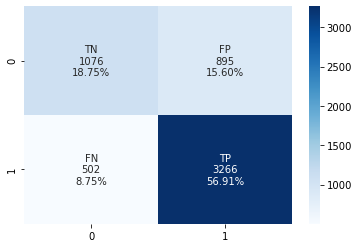

In [58]:
cf_matrix = confusion_matrix(true_y, pred_bool)

group_names  = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019

### Spliting Data to Train and Test

In [59]:
dummy_svm = pd.get_dummies(data_processed_drop_nan_sla)

In [60]:
X_svm = dummy_svm.drop(['made_sla'], axis=1)
y_svm = dummy_svm.made_sla

In [61]:
X_train_svm, X_validation_svm, y_train_svm, y_validation_svm = train_test_split(X_svm, y_svm, train_size=0.7, random_state=1234, stratify=y_svm)


### svm Classifier

In [62]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel


In [63]:
#Train the model using the training sets
clf.fit(X_train_svm, y_train_svm)


SVC(kernel='linear')

In [64]:
#Predict the response for test dataset
y_pred = clf.predict(X_validation_svm)

In [65]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy_score:",metrics.accuracy_score(y_validation_svm, y_pred))
print("Precision_score:",metrics.precision_score(y_validation_svm, y_pred))
print("Recall_score:",metrics.recall_score(y_validation_svm, y_pred))
print("f1_score:",metrics.f1_score(y_validation_svm, y_pred))

Accuracy_score: 0.745600278794215
Precision_score: 0.8009911319770475
Recall_score: 0.8150212314225053
f1_score: 0.8079452775585373


<AxesSubplot:>

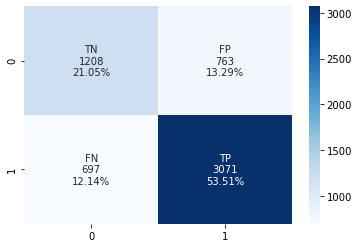

In [66]:
cf_matrix = confusion_matrix(y_validation_svm, y_pred)

group_names  = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Logistic regression

In [67]:

from sklearn.linear_model import LogisticRegression

In [68]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [69]:
# Train Decision Tree Classifer
logisticRegr = logisticRegr.fit(X_train_svm,y_train_svm)

C:\Users\isuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
#Predict the response for test dataset
y_pred = logisticRegr.predict(X_validation_svm)

In [71]:
print (logisticRegr)

LogisticRegression()


In [72]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy_score:",metrics.accuracy_score(y_validation_svm, y_pred))
print("Precision_score:",metrics.precision_score(y_validation_svm, y_pred))
print("Recall_score:",metrics.recall_score(y_validation_svm, y_pred))
print("f1_score:",metrics.f1_score(y_validation_svm, y_pred))

Accuracy_score: 0.7584945112388918
Precision_score: 0.7849282296650718
Recall_score: 0.8707537154989384
f1_score: 0.8256165072974333


<AxesSubplot:>

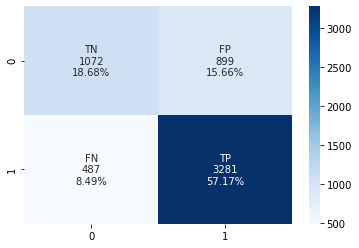

In [73]:
cf_matrix = confusion_matrix(y_validation_svm, y_pred)

group_names  = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Random Forest Model(Gaussian Classifier)

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [74]:
#Create a Gaussian Classifier
RF_clf=RandomForestClassifier(n_estimators=80)

In [75]:
#Train the model using the training sets y_pred=clf.predict(X_test)
RF_clf.fit(X_train_svm,y_train_svm)

RandomForestClassifier(n_estimators=80)

In [76]:
y_pred=RF_clf.predict(X_validation_svm)

In [77]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy_score:",metrics.accuracy_score(y_validation_svm, y_pred))
print("Precision_score:",metrics.precision_score(y_validation_svm, y_pred))
print("Recall_score:",metrics.recall_score(y_validation_svm, y_pred))
print("f1_score:",metrics.f1_score(y_validation_svm, y_pred))


Accuracy_score: 0.7534413660916536
Precision_score: 0.7895643613093773
Recall_score: 0.851380042462845
f1_score: 0.8193078789426638


<AxesSubplot:>

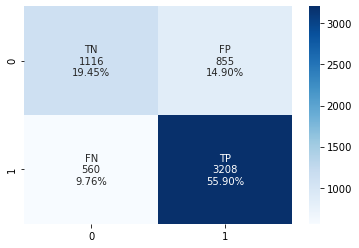

In [78]:
cf_matrix = confusion_matrix(y_validation_svm, y_pred)

group_names  = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Decision Tree Classifier

In [79]:
# Create Decision Tree classifer object
DT_clf = DecisionTreeClassifier()

In [80]:
# Train Decision Tree Classifer
DT_clf = clf.fit(X_train_svm,y_train_svm)

In [81]:
#Predict the response for test dataset
y_pred = DT_clf.predict(X_validation_svm)

In [82]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_validation_svm, y_pred))

Accuracy: 0.745600278794215


In [83]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy_score:",metrics.accuracy_score(y_validation_svm, y_pred))
print("Precision_score:",metrics.precision_score(y_validation_svm, y_pred))
print("Recall_score:",metrics.recall_score(y_validation_svm, y_pred))
print("f1_score:",metrics.f1_score(y_validation_svm, y_pred))

Accuracy_score: 0.745600278794215
Precision_score: 0.8009911319770475
Recall_score: 0.8150212314225053
f1_score: 0.8079452775585373


<AxesSubplot:>

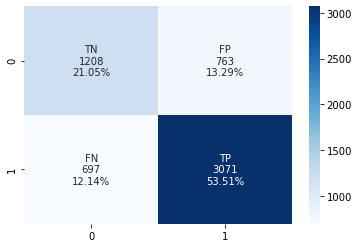

In [84]:
cf_matrix = confusion_matrix(y_validation_svm, y_pred)

group_names  = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Data cleansing

## Creating a method to check for values in the list

## Predicting and Evaluating the dataset

https://towardsdatascience.com/machine-learning-classifiers-comparison-with-python-33149aecdbca

In [85]:
# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

In [86]:
# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

In [87]:
# Define the models evaluation function
def models_evaluation(X_train_svm,y_train_svm):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''

### Perform cross-validation to each machine learning classifier

In [88]:
  log = cross_validate(log_model, X_train_svm,y_train_svm, scoring=scoring)

In [89]:
  svc = cross_validate(svc_model, X_train_svm,y_train_svm, scoring=scoring)

In [90]:
dtr = cross_validate(dtr_model, X_train_svm,y_train_svm, scoring=scoring)

In [91]:
rfc = cross_validate(rfc_model,X_train_svm,y_train_svm, scoring=scoring)

In [92]:
gnb = cross_validate(gnb_model, X_train_svm,y_train_svm, scoring=scoring)

In [93]:
# Create a data frame with the models perfoamnce metrics scores
models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
     
    
    # Add 'Best Score' column
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    
  

    
   

In [94]:
models_scores_table

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Best Score
Accuracy,0.741748,0.740777,0.716206,0.738312,0.712099,Logistic Regression
Precision,0.774825,0.773658,0.778221,0.779427,0.734361,Random Forest
Recall,0.855339,0.855566,0.794267,0.839076,0.880697,Gaussian Naive Bayes
F1 Score,0.813069,0.812528,0.786100,0.808089,0.800692,Logistic Regression
